# Essential Libraries

In [5]:
import numpy as np                      # a library that offers comprehensive mathematical functions
import pandas as pd                     # a library crucial for data acquisation and preparation
import seaborn as sb                    # a library for statistical data visualisation
import matplotlib.pyplot as plt         # a library for statistical data visualisation
sb.set()  

In [6]:
threeVars = pd.read_pickle('threeVars.pickle')
threeVarsNum = pd.read_pickle('threeVarsNum.pickle')

----------------------------


 We realise that ram_memory is the most influential factor when it comes to the prices of laptops from our previous Machine Learning Models. Hence, we decide to now predict the price of laptops based on their ram_memory and below are the predictive regression models we used.

Intercept of Regression 	: b =  2405.3373908995272
Coefficients of Regression 	: a =  [5817.89464681]

   Predictors  Coefficients
0  ram_memory   5817.894647



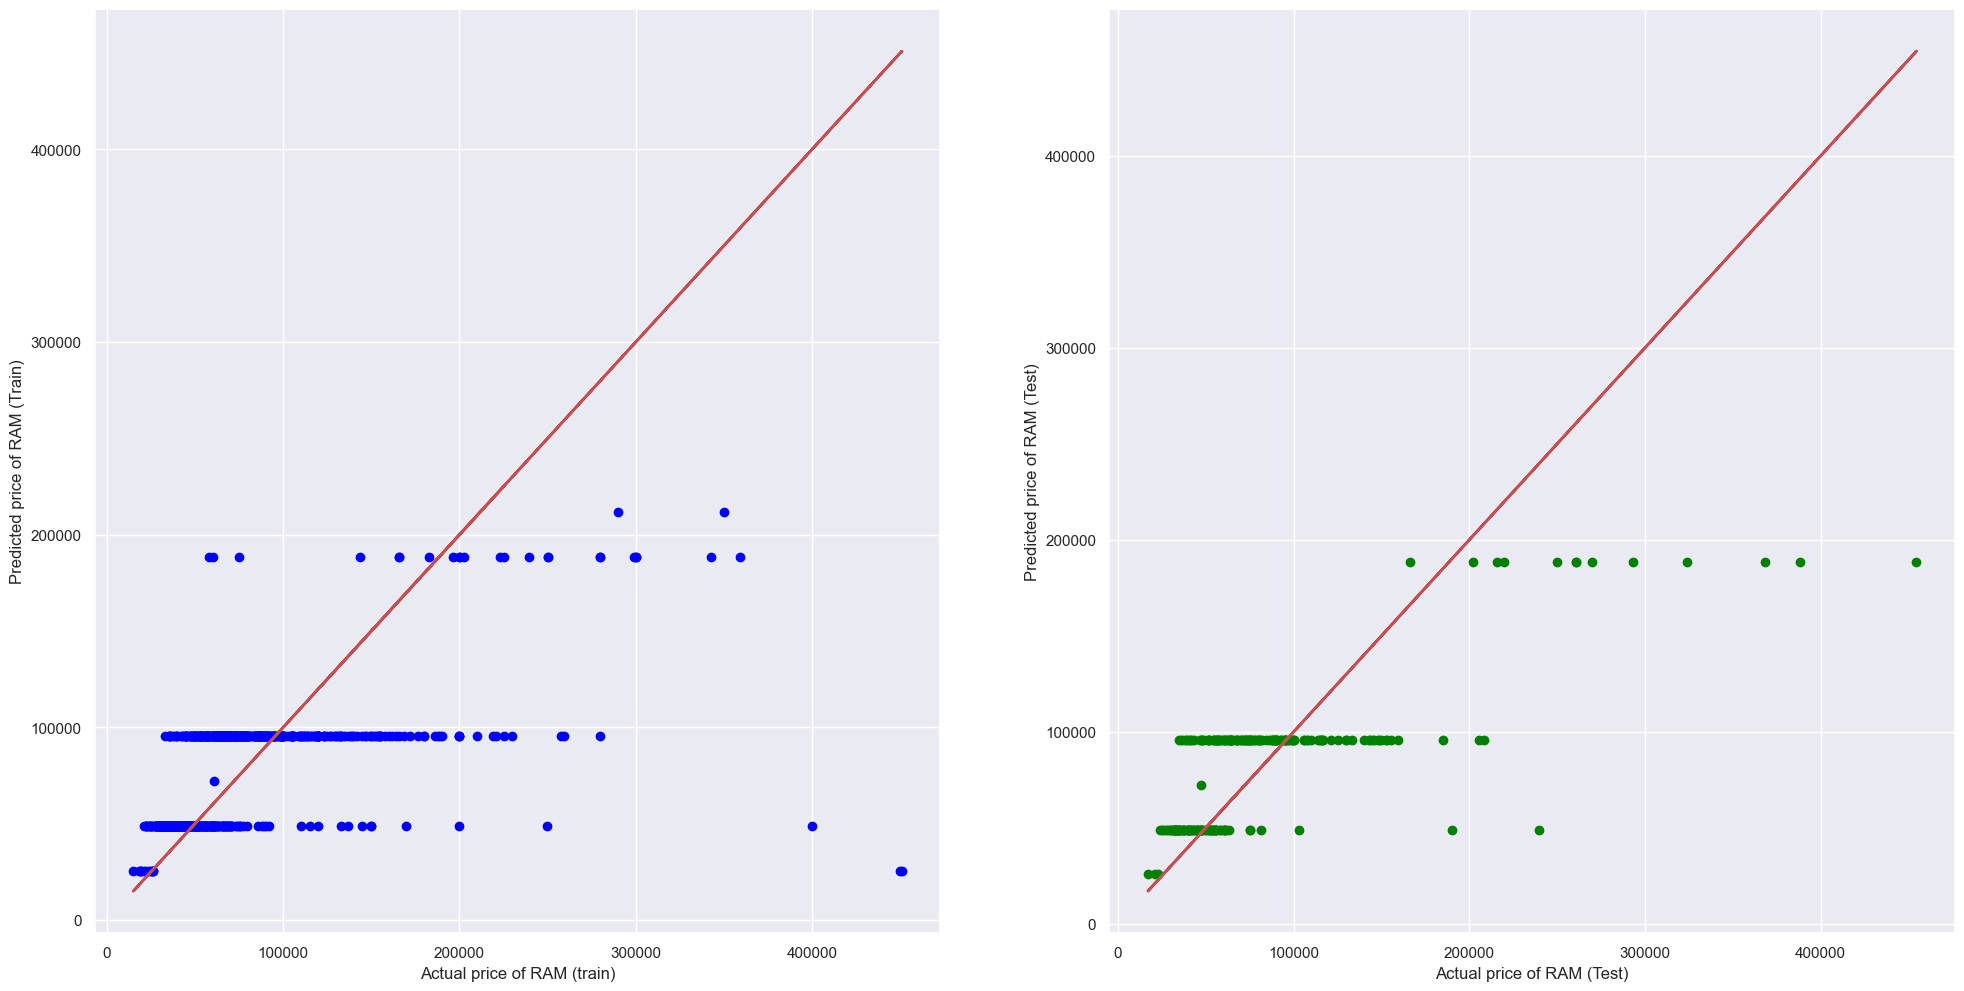

Mean Squared Error (MSE): 1871658348.73
R-squared (R^2): 0.53
Random Forest - Mean Squared Error (MSE): 1630765042.69
Random Forest - R-squared (R^2): 0.59
Gradient Boosting - Mean Squared Error (MSE): 1621641652.26
Gradient Boosting - R-squared (R^2): 0.59


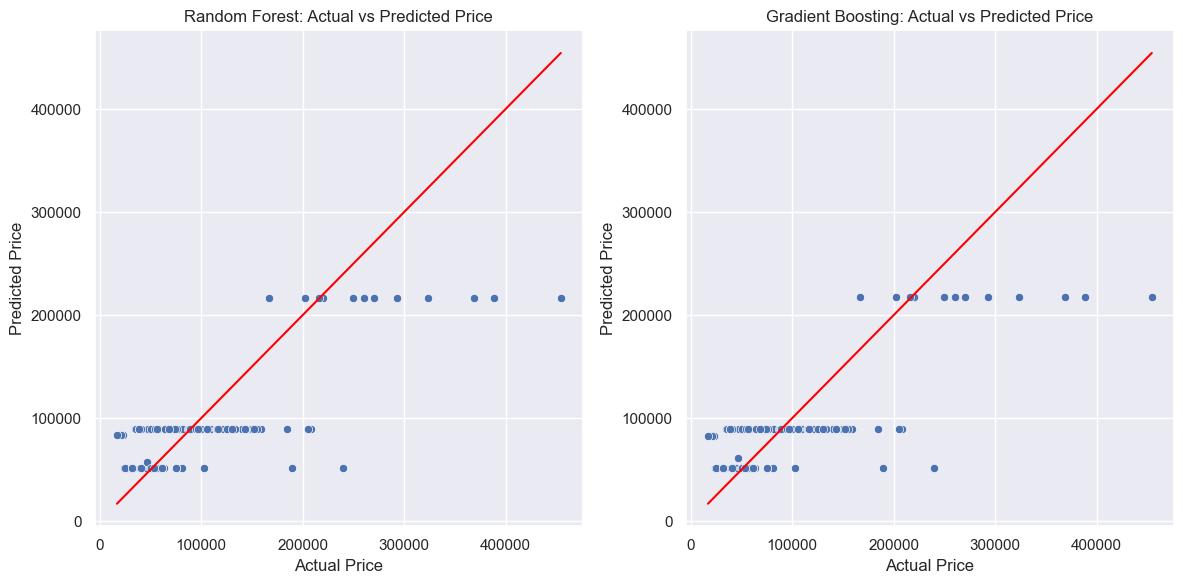

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import seaborn as sns
import matplotlib.pyplot as plt

# Define features and target variable
features = ['ram_memory']
target = 'Price'

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(threeVars[features], threeVars[target], test_size=0.25, random_state=10)
linreg1=LinearRegression()
linreg1.fit(X_train, y_train)

print('Intercept of Regression \t: b = ', linreg1.intercept_)
print('Coefficients of Regression \t: a = ', linreg1.coef_)
print()

# Print coefficients with feature names
print(pd.DataFrame([(features[i], linreg1.coef_[i]) for i in range(len(features))], columns = ["Predictors", "Coefficients"]))
print()
y_train_pred = linreg1.predict(X_train)
y_test_pred = linreg1.predict(X_test)
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'r-', linewidth = 2)
axes[0].set_xlabel("Actual price of RAM (train)")
axes[0].set_ylabel("Predicted price of RAM (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'r-', linewidth = 2)
axes[1].set_xlabel("Actual price of RAM (Test)")
axes[1].set_ylabel("Predicted price of RAM (Test)")
plt.show()
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R^2): {r2:.2f}")
rf_model = RandomForestRegressor(random_state=10)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=10)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)

# Calculate and print evaluation metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Random Forest - R-squared (R^2): {r2_rf:.2f}")

mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print(f"Gradient Boosting - Mean Squared Error (MSE): {mse_gb:.2f}")
print(f"Gradient Boosting - R-squared (R^2): {r2_gb:.2f}")

# Plot the actual vs predicted prices for each model
plt.figure(figsize=(12, 6))

# Random Forest scatter plot
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Random Forest: Actual vs Predicted Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

# Gradient Boosting scatter plot
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y=y_pred_gb)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.title('Gradient Boosting: Actual vs Predicted Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')

# Show the plot
plt.tight_layout()
plt.show()


**Upon analysing and predicting the prices of laptops based on their ram_memory values, we note that simply predicting the prices of laptops based solely on RAM might not be the best solution and other numerical factors may also have to be included in the prediction modelling. We then decided to delve deeper and see whether a higher priced laptop would mean that it has a higher rating, and by extension, whether a lower priced laptop has a lower rating, a mid-priced laptop has an average rating etc. We did this to suggest to users which laptop would be the most worth for its price.**

### Analysis of whether a higher pricing of a laptop equates to a higher rating of the laptop.


#### We will set a hypothesis: The higher the price of the laptop, the higher the rating of the laptop. We have seen that the price of the laptop is affected by its brand, processor_brand, and most importantly, the RAM memory of the laptop. We will now test to see whether a highly priced laptop will have a high rating.

Mean Price and Mean Rating for each Brand:
        brand          Price     Rating
0        acer   62847.876404  61.775281
1       apple  193875.333333  53.533333
2        asus   78290.223810  65.438095
3        dell  101701.132075  64.603774
4          hp   76184.303922  64.598039
5     infinix   38220.769231  57.230769
6      lenovo   65527.562189  62.552239
7          lg  115284.714286  72.142857
8         msi   94260.433333  70.888889
9     samsung   67990.000000  61.714286
10  zebronics   39132.857143  64.857143


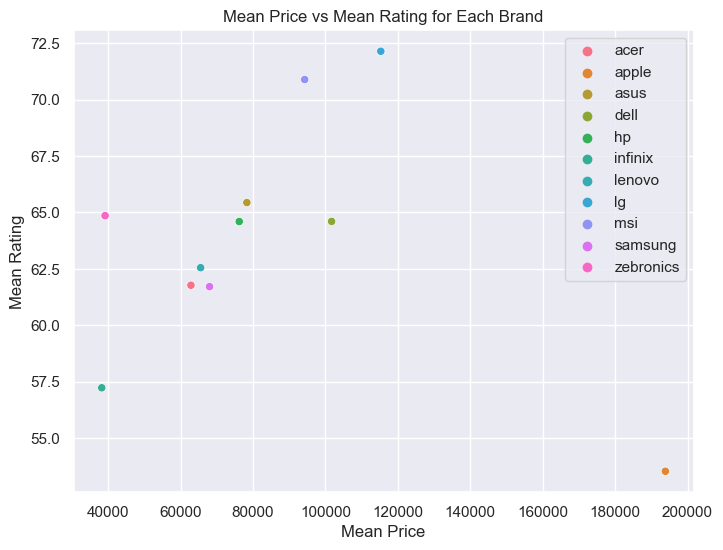

In [10]:

brand_grouped = threeVars.groupby('brand').agg({'Price': 'mean', 'Rating': 'mean'}).reset_index()

# Print mean price and mean rating for each brand
print("Mean Price and Mean Rating for each Brand:")
print(brand_grouped)

# Plot the scatter plot of mean price against mean rating for each brand
plt.figure(figsize=(8, 6))
sb.scatterplot(data=brand_grouped, x='Price', y='Rating', hue='brand')
plt.title('Mean Price vs Mean Rating for Each Brand')
plt.xlabel('Mean Price')
plt.ylabel('Mean Rating')

# Fit a linear regression model
X = brand_grouped['Price'].values.reshape(-1, 1)
y = brand_grouped['Rating'].values
model = LinearRegression()
model.fit(X, y)
from sklearn.metrics import r2_score

# Assume y is the actual values of the dependent variable (e.g., mean rating)
# Assume y_pred is the predicted values from the regression model
r2 = r2_score(y, model.predict(X))

# Plot the regression line
x_range = np.linspace(brand_grouped['Price'].min(), brand_grouped['Price'].max(), 100)
y_pred = model.predict(x_range.reshape(-1, 1))

# Add legend
plt.legend()

# Show the plot
plt.show()

Polynomial Regression (degree 2)
Mean Squared Error (MSE): 8.97
R-squared (R^2): 0.65


C:\Users\User\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


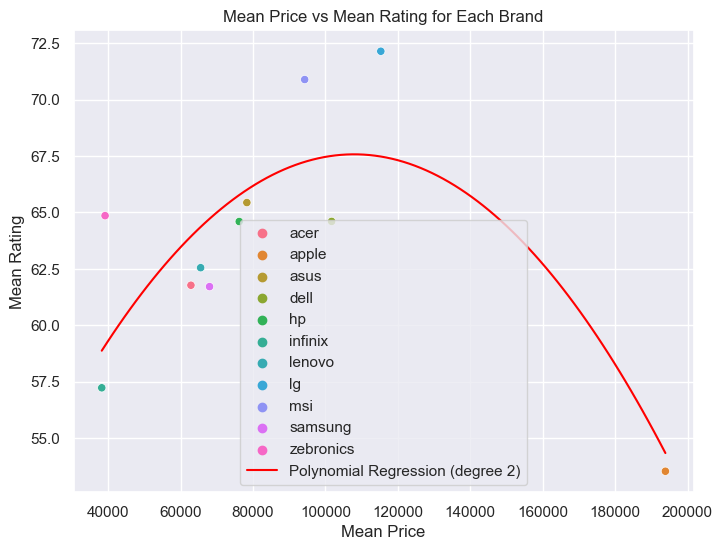

In [11]:

brand_grouped = threeVars.groupby('brand').agg({'Price': 'mean', 'Rating': 'mean'}).reset_index()
from sklearn.preprocessing import PolynomialFeatures
degree = 2  
poly = PolynomialFeatures(degree=degree, include_bias=False)
X_poly = poly.fit_transform(brand_grouped[['Price']])

model = LinearRegression()

model.fit(X_poly, brand_grouped['Rating'])

# Predict ratings based on the model
y_pred = model.predict(X_poly)


mse = mean_squared_error(brand_grouped['Rating'], y_pred)
r2 = r2_score(brand_grouped['Rating'], y_pred)

# Print evaluation metrics
print(f"Polynomial Regression (degree {degree})")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R^2): {r2:.2f}")

# Plot the scatter plot of mean price against mean rating for each brand
plt.figure(figsize=(8, 6))
sb.scatterplot(data=brand_grouped, x='Price', y='Rating', hue='brand')

# Plot the polynomial regression line
price_range = np.linspace(brand_grouped['Price'].min(), brand_grouped['Price'].max(), 100)
price_poly = poly.transform(price_range.reshape(-1, 1))
rating_pred = model.predict(price_poly)
plt.plot(price_range, rating_pred, color='red', label=f'Polynomial Regression (degree {degree})')

# Add title and labels
plt.title('Mean Price vs Mean Rating for Each Brand')
plt.xlabel('Mean Price')
plt.ylabel('Mean Rating')
plt.legend()

# Show the plot
plt.show()

**For most of the data, it can be observed that a higher price would result in a higher rating, with the exception of the anomaly of Apple, which has the lowest mean rating but ironically, the highest mean price. We would suggest purchasing laptops from LG or MSI, which have the highest ratings at a mean price that is much lower than that of Apple.**